# Kalorimetrie Laborversuch

Author: Hiab Berhane

Datum: 12.12.2023

Gruppe: 02

## Forschungsfrage

Formulieren Sie eine oder mehrere Forschungsfragen zu diesem Versuch.

Wie genau können die Wärmekapazitäten von verschiedenen Materialien bestimmt werden wenn man anstatt die Messungen zu Hause durch zu führen an einem speziellen dafür ausgerichteten Laborverusch macht?

## Versuchsaufbau und Durchführung

Beschreiben Sie den Versuchsaufbau und die Versuchsdurchführung. Nutzen Sie hier Ihr eigenes Bild.

Erst wurde das Wasser im Becken auf 80 Grad erhitzt und dann die drei Proben ausgesucht und gewogen. Zur Bestimmung der einzelnen Wärmekapazitäten wurden die Proben erst im 80 Grad warmen Wasser erhitzt und dann in ein Becherglas getan mit 400 ml Wasser und dann die Temperatur gemessen, bis sich die Temperatur im Becherglas nicht mehr ändert.
Der Versuchsaufbau besteht aus folgenden verschiedenen Komponenten: Rechts befindet sich ein mit Wasser gefüllter Topf, in dem mithilfe des Garers eine konstante Temperatur gehalten wird. Links daneben steht ein Becherglas, welches mit Wasser gefüllt wird und mit einem Magnetrührer durchmischt werden kann. Mit insgesamt fünf Temperatursensoren wird die Temperatur im Topf, der Umgebung und im Becherglas gemessen.


<img src="figures/kalorimetrie_pruefstand.jpg" width="800">


## Versuchsauswertung

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import h5py as h5
import importlib

from functions import m_json
from functions import utility

# Use FST-Style, if you don't like it, you can safely delete this line.
plt.style.use("FST.mplstyle")


### Kalorimeterkonstante
Hinweis: Sie können die Funktion *get_json_entry* nutzen um auf Metadaten zuzugreifen. 

Für die Messdatenauswertung steht Ihnen bereits ein Modul utility.py zur Verfügung. Ergänzen sie die Funktionen im Modul zwischen TODO und DONE. Sie finden weitere Hinweise im jeweiligen Bereich TODO->DONE. 


#### (i) Messdaten einlesen
Lesen Sie die Messdaten in ihr Notebook ein.

In [2]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_const = "data/Constant/Constant.h5"


# DONE #

In [3]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_const, "RawData")
print(len(data_dict['timestamp'][0]))
# DONE #

75


In [4]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.
# List the index of all calorimeter sensors (index_calorimeter) and
# the environment sensor (index_environment).
# You can use this variables to easily get access to the correct measurement data later.

index_calorimeter = [0, 1, 2]
index_environment = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

Die Mittelwerte und Standardabweichungen der Messungen werden in der nächsten Sektion geplottet.

Nachdem die Mittelwerte und Standardabweichungen berechnet wurden, können Daten jeder Wärmequelle jeweils in einem numpy.ndarray gespeichert werden.

In [5]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of the calorimeter sensors and the environment sensor.
# You can use the indices from above.
mean_std_calorimeter_dict={}
mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_environment])

time_cal = data_dict['timestamp'][index_calorimeter][0]
time_env = data_dict['timestamp'][index_environment][0]

data = [mean_std_calorimeter, mean_std_environment]
time = [time_cal, time_env]
#zum Testen ob die Richtigen Zahlen ausgegeben werden
#print(data)
#print(time)

# DONE #

#### (iii) Daten ploten

Im Kalorimeter befinden sich mehrere Sensoren, deren Mittelwerte sowie Standardabweichungen der Messung an jeden Zeitpunkt bestimmt wurden. Die Messdaten bzw. ihre Mittelwerte sollen in einem Plot eingetragen werden. Die Standardabweichungen der Sensoren sind als Errorbar im Plot zu sehen.

findfont: Font family ['Verdana'] not found. Falling back to DejaVu Sans.


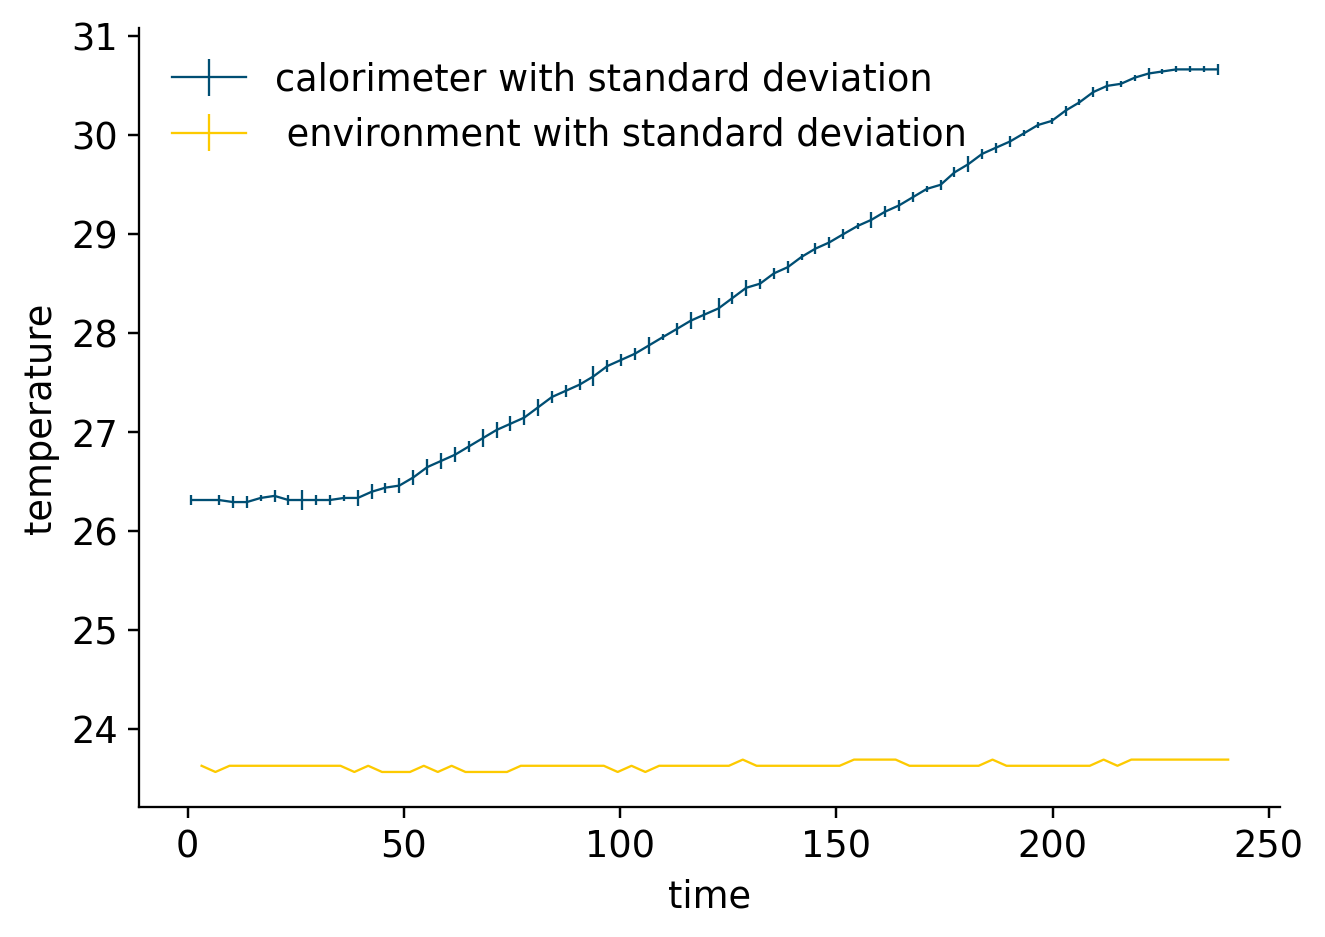

In [6]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting

utility.plot_temp_over_time(data, time,['calorimeter with standard deviation',' environment with standard deviation'], 'time', 'temperature')

# DONE #

#### (iv) Metadaten auslesen

Die notwendigen Daten bzw. Metadaten für die Berechnung der Wärmekapazität wird ausgelesen.

In [7]:
# Heat capacity of Water has been given
water_heat_capa = 4.18

# TODO: Read mass of the water from the metadata of the experiment.

water_mass = m_json.get_json_entry("datasheets", "1ee5ec0c-0b57-68cd-9d39-c9b7e9b18753", ["calorimeter", "medium", "mass", "value"])

print(water_mass)

# DONE #

400


In [8]:
# TODO: Reading heater related data from hdf5 file, please use the same datafile_path_const variable for the HDF5 path.
# Hint: Note whether the data is stored as an array or a scalar in the hdf5 dataset.
path_hdf5 = "data/Constant/Constant.h5"
f= h5.File(path_hdf5, "r")
h=f["RawData/1ee21744-0355-6023-94b4-d5c041dd32cd"]
current = h["current"][()]
heat_time =h["heat_time"][()]*60 #die angabe ist in Minuten deswegen mal 60 am ende damit die Einheit auf Sekunden ist
voltage = h["voltage"][()]

print(voltage)
print(current)
print(heat_time)

# DONE #

12.5
4.0
180.0


#### (v) Anfangs- und Endwert der Temperatur
Die Anfangs- und Endwert der Temperatur im Kloriemeter sind notwendig, um die Wärmekapazität zu bestimmen. 

Eine Möglichkeit wäre, durch das Maxium bzw. Minium und einen Schwellenwert ist ein Teil der Daten zu entnehmen. 

Daraus sind Mittelwerte zu berechnen. Die entsprechenden Mittelwerte können als Anfangs- und Endtemperatur verwendet werden.

In [9]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_end, temperature_start = utility.get_start_end_temperature(data_dict['temperature']) 
print(temperature_end, temperature_start)

# DONE #

30.11908783783784 23.6275


#### (vi) Kalorimeterkonstante bestimmen
$$
C = \frac{UI\Delta t}{(T_2 - T_1)}
$$

In [10]:
# TODO: Calculate heat capacity of the calorimeter

calorimeter_const = (voltage*current*heat_time)/(temperature_end-temperature_start)

# DONE #

#### (Vii) Ergebnis

In [11]:
calorimeter_const

1386.4096465800335

### spezifische Wärmekapazität: erste Probe


#### (i) Messdaten einlesen

In [12]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob1 = "data/PDC_0011/PDC_0011.h5"

# DONE #

In [13]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob1, 'RawData')

# DONE #

In [14]:


# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [15]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_bath = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])

time_calorimeter = data_dict['timestamp'][index_calorimeter][0]
time_environment = data_dict['timestamp'][index_env][0]
time_bath = data_dict['timestamp'][index_bath][0]

data = [mean_std_calorimeter, mean_std_environment, mean_std_bath]
time = [time_calorimeter, time_environment, time_bath]
#zum Testen ob die Richtigen Zahlen ausgegeben werden
#print(data)
#print(time)
# DONE #

#### (iii) Daten ploten

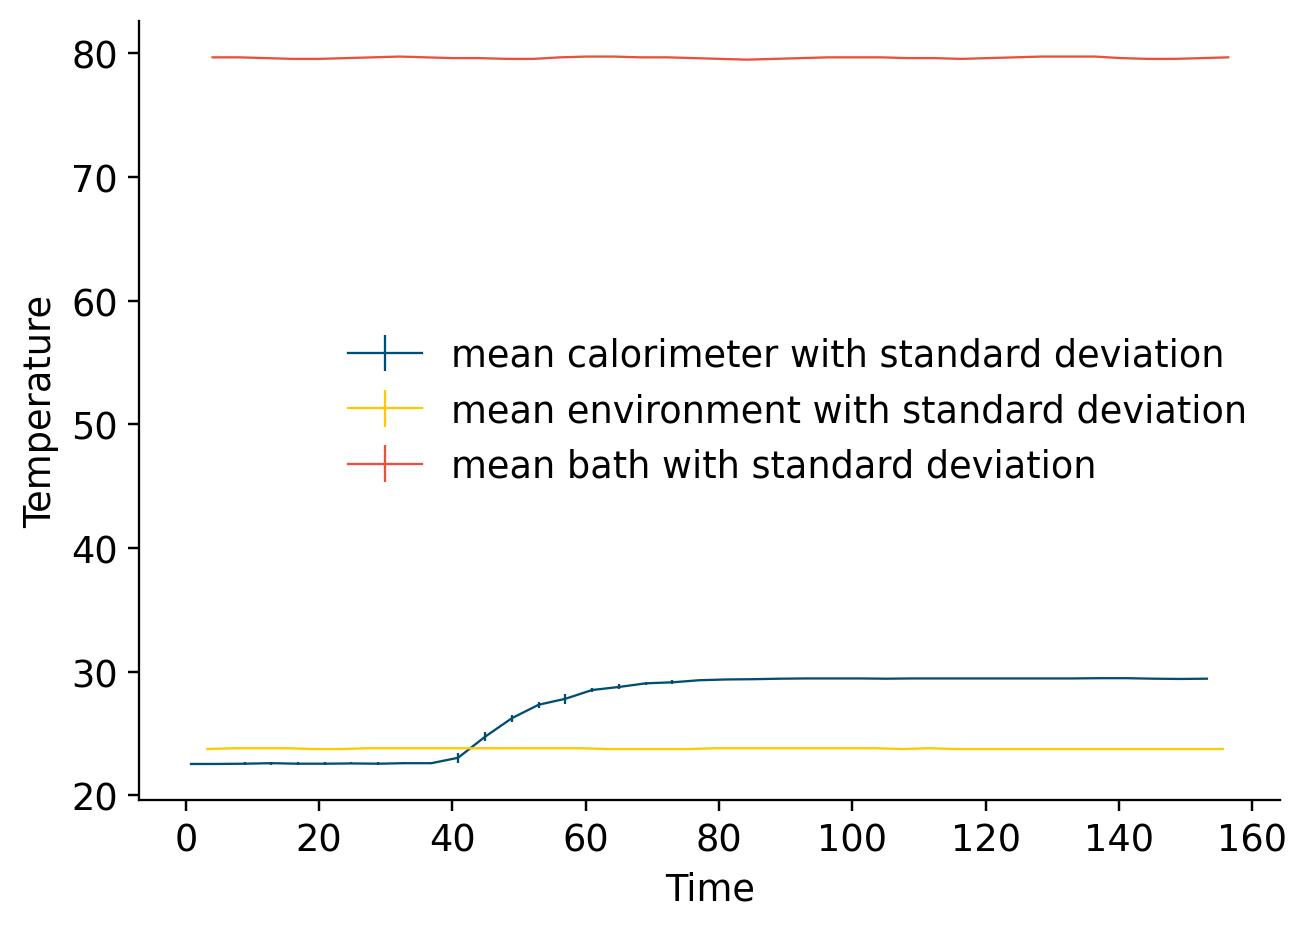

In [16]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time(data, time, ['mean calorimeter with standard deviation', 'mean environment with standard deviation', 'mean bath with standard deviation'], 'Time', 'Temperature')
# DONE #

#### (iv) Metadaten auslesen

In [17]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass =m_json.get_json_entry("datasheets", "1ee57b37-1b00-6b47-b00e-8332e0df15ea", ["probe", "mass", "value"])
print(sample_mass)
# DONE #

680


#### (v) Anfangs- und Endwert der Temperatur
Die Mischungstemperatur und Anfangstemperatur des Kalorimeters sind für die Berechnung relevant.

In [18]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter]) 
print(temperature_mix, temperature_start_water)
# DONE #

29.331335616438356 22.615530303030305


In [19]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 temperature-values after the start of the measurement.

temperature_start_sample =  np.mean(data_dict['temperature'][4][:10])
print(temperature_start_sample)


# DONE #

79.65


#### (vi) spezifische Wärmekapazität bestimmen
$$
c_p = \frac{C(T_M-T_1)}{m_p(T_2-T_M)}
$$

In [20]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))
# DONE #

#### (Vii) Ergebnis

In [21]:
sample_heat_capa

0.27211447940975403

### spezifische Wärmekapazität: zweite Probe


#### (i) Messdaten einlesen

In [22]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob2 = "data/PDC_010/PDC_010.h5"

# DONE #

In [23]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob2,'RawData')

# DONE #

In [24]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [25]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_bath = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])

time_calorimeter = data_dict['timestamp'][index_calorimeter][0]
time_environment = data_dict['timestamp'][index_env][0]
time_bath = data_dict['timestamp'][index_bath][0]

data = [mean_std_calorimeter, mean_std_environment, mean_std_bath]
time = [time_calorimeter, time_environment, time_bath]
#zum Testen ob die Richtigen Zahlen ausgegeben werden
#print(data)
#print(time)
# DONE #

#### (iii) Daten ploten

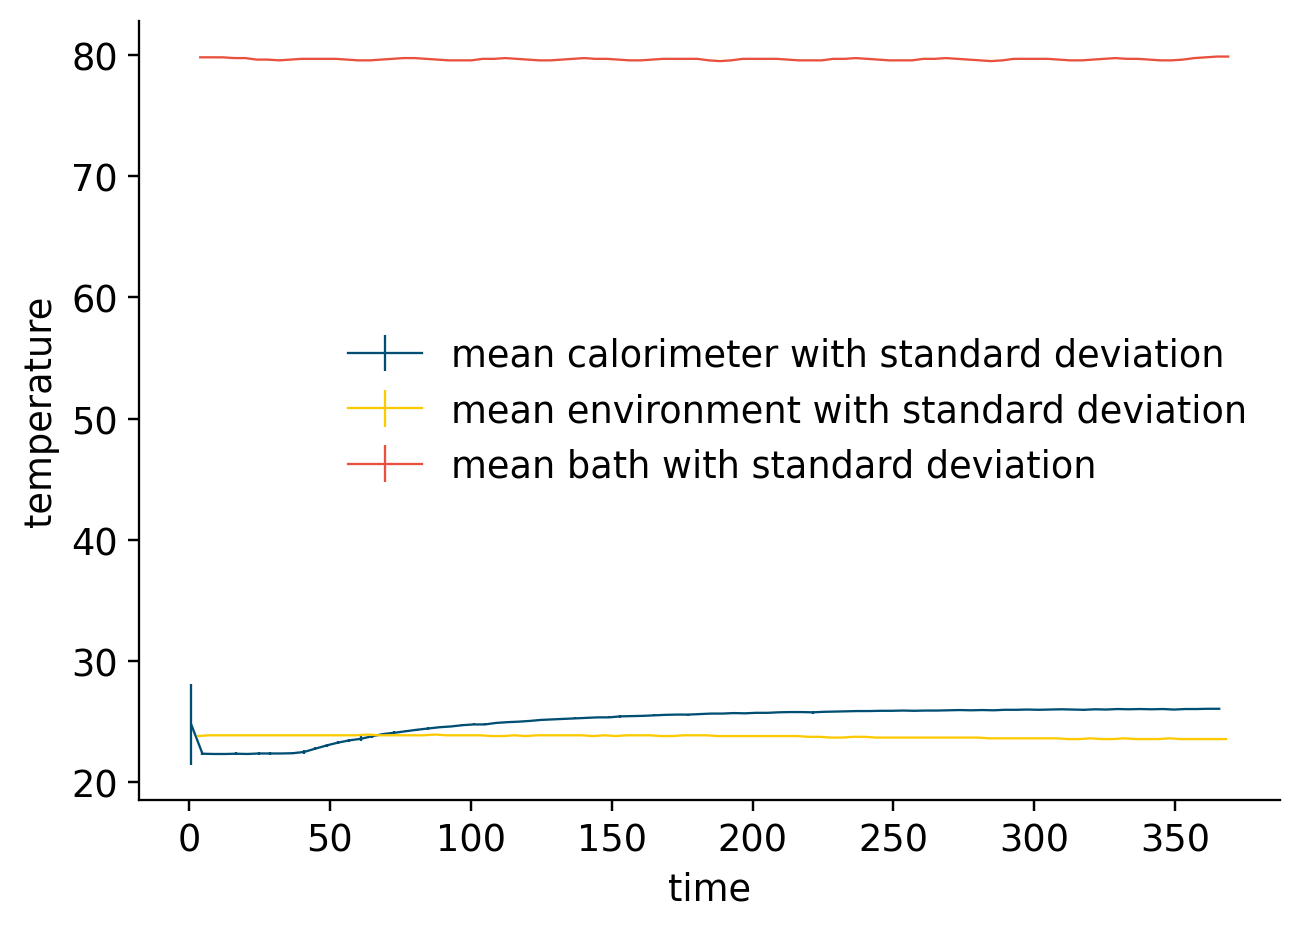

In [26]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time(data, time, ['mean calorimeter with standard deviation', 'mean environment with standard deviation', 'mean bath with standard deviation'], 'time', 'temperature')

# DONE #

#### (iv) Metadaten auslesen

In [27]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry("datasheets", "1ee57b36-18e3-6dbc-a7dc-7a8460286908", ["probe", "mass", "value"])
print(sample_mass)
# DONE #

111


#### (v) Anfangs- und Endwert der Temperatur

In [28]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter])
print(temperature_mix)
print(temperature_start_water)
# DONE #

29.5
22.4953125


In [29]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][4][:10])
print(temperature_start_sample)
# DONE #

79.70625


#### (vi) spezifische Wärmekapazität bestimmen

In [30]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))

# DONE #

#### (Vii) Ergebnis

In [31]:
sample_heat_capa

1.7426074777181206

### spezifische Wärmekapazität: dritte Probe


#### (i) Messdaten einlesen

In [32]:
# TODO: Define the path to hdf5 file, which containing experiment data for constant.

datafile_path_prob3 = "data/PDC_019/PDC_019.h5"

# DONE #

In [33]:
importlib.reload(utility)

# TODO: Read all experimental data and associated metadata from HDF5 files for data processing.

data_dict = utility.get_plot_data_from_dataset(datafile_path_prob3, 'RawData')

# DONE #

In [34]:
# TODO: In order to be able to process data from sensors with the same position,
# it is first necessary to obtain the index of the sensors with different positions in the numpy.ndarray.

index_calorimeter = [0,1,2]
index_bath = [4]
index_env = [3]

# DONE #

#### (ii) Mittelwert und Standardabweichung für Plots bestimmen

In [35]:
importlib.reload(utility)

# TODO: Calculate the average value and standard deviation of sensors.

mean_std_calorimeter = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_calorimeter])
mean_std_bath = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_bath])
mean_std_environment = utility.cal_mean_and_standard_deviation(data_dict['temperature'][index_env])

time_calorimeter = data_dict['timestamp'][index_calorimeter][0]
time_environment = data_dict['timestamp'][index_env][0]
time_bath = data_dict['timestamp'][index_bath][0]

data = [mean_std_calorimeter, mean_std_environment, mean_std_bath]
time = [time_calorimeter, time_environment, time_bath]

#zum Testen ob die Richtigen Zahlen ausgegeben werden
#print(data)
#print(time)
# DONE #

#### (iii) Daten ploten

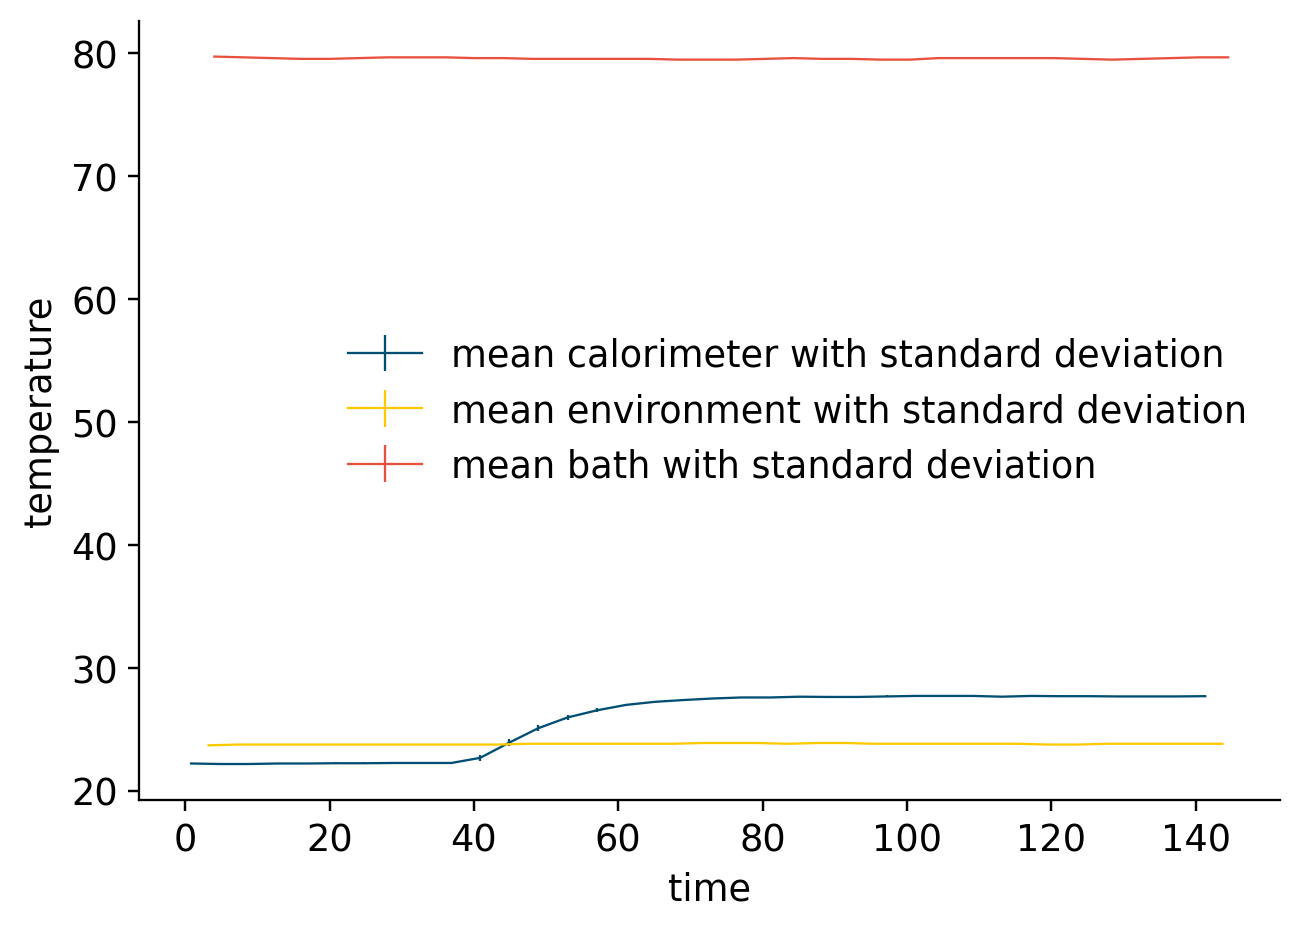

In [36]:
importlib.reload(utility)

# TODO: Use the temperature and time data for plotting.

utility.plot_temp_over_time(data, time, ['mean calorimeter with standard deviation', 'mean environment with standard deviation', 'mean bath with standard deviation'], 'time', 'temperature')
# DONE #

#### (iv) Metadaten auslesen

In [37]:
# TODO: Read mass of the sample from the metadata of the experiment.

sample_mass = m_json.get_json_entry("datasheets", "1ee57b5f-6253-6438-a83f-4c0437beda63", ["probe", "mass", "value"])
print(sample_mass)

# DONE #

226


#### (v) Anfangs- und Endwert der Temperatur

In [38]:
importlib.reload(utility)

# TODO: Calculation of temperature data necessary to determine the specific heat capacity

temperature_mix, temperature_start_water = utility.get_start_end_temperature(data_dict['temperature'][index_calorimeter])
print(temperature_mix, temperature_start_water) 

# DONE #

27.540719696969695 22.257575757575758


In [39]:
# TODO: Determine the initial temperature of the sample. 
# Since the temperature of the water bath is stable, the initial temperature
# of the sample can be taken as the average of the 10 data after the start of the measurement.

temperature_start_sample = np.mean(data_dict['temperature'][4][:10])
print(temperature_start_sample)
# DONE #

79.65


#### (vi) spezifische Wärmekapazität bestimmen

In [40]:
# TODO: Calulate specific heat capacity of the sample.

sample_heat_capa = (calorimeter_const*(temperature_mix-temperature_start_water))/(sample_mass*(temperature_start_sample-temperature_mix))


# DONE #

#### (Vii) Ergebnis

In [41]:
sample_heat_capa

0.6219572011663316

## Diskussion
Analysieren Sie Ihre Ergebnisse aus wissenschaflticher Sicht. Berücksichtigen Sie dabei Ihre oben genannte Forschungsfrage. Wie wirkt sich die mit der Probe aus dem Heißwasserbad transportierte Wassermenge auf das Ergebnis aus? Welche weiteren Fehlerquellen gibt es?

Die spezifischen Wärmekapazitäten der ersten beiden Proben sind größer als der reale Wert, der Wert der dritten Probe ist dabei niedriger als der der von mir ausgerechnet wurde. Dabei ist die erste Probe am nähsten an dem realen Wert dran. Also rückwirkend auf meine Forschungsfrage kann man sagen das hier die Messfehler viel kleiner sind als wenn man den Versuch zu Hause machen würde, alleine durch den Garer der das Wasser auf eine konstante Temperatur hält gewinnt der Verusch an Qualität und Genauigkeit, dennoch sind die Messdaten abweichend vom realen Wert was aber zu erwarten ist, es bestehen immer noch Fehler wie zum Beispiel das die Waage eine Messungenauigkeit von 1 gramm hat, oder das es einen Fehler durch uns gab, wie zum Beispiel das wir die Probe nicht immer genau 30 sekunden im Wärmebecken hatten sondern manchmal 40 oder 35, da wir so wenig warmes Wasser in das Becherglass mitnehmen wollten. Das könnte nähmlich ein weitere Fehler sein, die Wassermitnahme vom 80 Grad warmen Wasser in das Wasser mit Zimmertemperatur, das es die Zeit verfälscht die das Wasser braucht um eine konstante Temperatur zu erreichen.

## Fazit
Ziehe Sie ein persönliches Fazit zum Versuch.

Der Verusch hat mir gezeigt wie man mit gewissen verschiedenen Werkzeugen umgeht, wie zum Beispiel mit heißen Proben um zu gehen oder eine Waage zu benutzen. Auch hat es mir klar gemacht das egal wie sehr man die benutzten Geräte verbessert in Anischt der Verkleinerung der Fehlerrate solange man den Versuch als Mensch selber macht bleibt der Aspekt Menschenfehler bestehen.